In [32]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib


In [33]:
# Step 2: Load the Dataset
df = pd.read_csv("/content/Harvest_Prediction_Factors_Merged.csv")  # Update path if needed


In [34]:
# Step 3: Encode Categorical Variables
label_encoders = {}
categorical_features = ['Paddy Variety', 'Soil Type', 'Irrigation Type', 'Water Source', 'Pest Severity', 'Season', 'District']

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [35]:
# Step 4: Define Features & Target Variable
X = df.drop(columns=[" Yield (kg)"])
y = df[" Yield (kg)"]

In [36]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Step 6: Train LightGBM Regressor Model
lgbm_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1656
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 17
[LightGBM] [Info] Start training from score 34133.653420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMRegressor(learning_rate=0.05, max_depth=4, n_estimators=200,
              random_state=42)

In [38]:
# Step 7: Model Evaluation
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print(f"🔹 LightGBM R² (Train): {r2_train:.4f}")
print(f"🔹 LightGBM R² (Test): {r2_test:.4f}")
print(f"🔹 Mean Absolute Error: {mae:.2f}")
print(f"🔹 Mean Squared Error: {mse:.2f}")

🔹 LightGBM R² (Train): 0.9891
🔹 LightGBM R² (Test): 0.9768
🔹 Mean Absolute Error: 481.26
🔹 Mean Squared Error: 4105246.39


In [47]:
# Calculate R² (Coefficient of Determination) for Train and Test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"🔹 LightGBM R² (Train): {r2_train:.4f}")
print(f"🔹 LightGBM R² (Test): {r2_test:.4f}")


🔹 LightGBM R² (Train): 0.9891
🔹 LightGBM R² (Test): 0.9768


In [48]:
# Calculate R² (Coefficient of Determination) for Train and Test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Convert R² to accuracy percentage
accuracy_train = r2_train * 100  # Accuracy as a percentage for training set
accuracy_test = r2_test * 100  # Accuracy as a percentage for test set

# Print results
print(f"🔹 LightGBM Training Accuracy: {accuracy_train:.2f}%")
print(f"🔹 LightGBM Test Accuracy: {accuracy_test:.2f}%")


🔹 LightGBM Training Accuracy: 98.91%
🔹 LightGBM Test Accuracy: 97.68%


In [39]:
# Step 8: Save the Model
joblib.dump(lgbm_model, "lgbm_paddy_yield_model.pkl")


['lgbm_paddy_yield_model.pkl']

In [40]:
# Step 9: Load Model for Prediction
lgbm_model = joblib.load("lgbm_paddy_yield_model.pkl")

In [41]:
# Function to Predict Yield with Comparison
def predict_yield():
    input_features = X.columns.tolist()

    user_data = {}
    for feature in input_features:
        if feature in categorical_features:
            user_data[feature] = input(f"Enter {feature}: ")
        else:
            user_data[feature] = float(input(f"Enter {feature}: "))

    previous_yield = float(input("Enter Previous Yield (kg/ha): "))

    user_df = pd.DataFrame([user_data])

    for col in categorical_features:
        if col in user_df:
            if user_df[col][0] in label_encoders[col].classes_:
                user_df[col] = label_encoders[col].transform([user_df[col][0]])[0]
            else:
                print(f"⚠️ Warning: Unknown category '{user_df[col][0]}' for feature '{col}'. Assigning default value.")
                user_df[col] = -1

    user_df = user_df[X.columns]

    predicted_yield = lgbm_model.predict(user_df)[0]

    print("=========================")
    print(f"🌾 Predicted Harvest Yield: {predicted_yield:.2f} kg/ha")
    print("=========================")

    if previous_yield > predicted_yield:
        print("⚠️ Warning: Your predicted yield is lower than the previous yield.")
        print("🔹 Recommendations:")
        print("- Optimize fertilizer usage based on soil tests.")
        print("- Improve irrigation practices for consistent water supply.")
        print("- Consider pest control measures to minimize yield loss.")
        print("- Use high-yield paddy varieties suitable for the district.")
        print("- Apply balanced soil nutrients and organic matter.")
    else:
        print("✅ Your yield is expected to be stable or improve!")
        print("🔹 Recommendations for Further Improvement:")
        print("- Continue current agricultural practices.")
        print("- Monitor soil health and apply nutrients accordingly.")
        print("- Use precision farming tools to track crop progress.")
        print("- Plan for seasonal crop rotation to maintain soil fertility.")
        print("- Use modern harvesting techniques to reduce post-harvest losses.")


In [42]:
# Run Prediction
predict_yield()

Enter Rainfall (mm): 900
Enter Temperature (°C): 35
Enter Relative Humidity (%): 64
Enter Sunshine Hours (hrs): 12
Enter Wind Speed (km/h): 9
Enter Soil Type: Sandy
Enter Irrigation Type: Rainfed
Enter Water Source: Well
Enter Paddy Variety: BG 450
Enter Fertilizer Usage (kg): 35
Enter Area (hectare): 53
Enter Soil Nitrogen (mg/kg): 32
Enter Soil Phosphorus (mg/kg): 33
Enter Soil Potassium (mg/kg): 35
Enter Pest Severity: Low
Enter Season: Yala
Enter District: Puttalam
Enter Previous Yield (kg/ha): 2346
⚠️ Warning: Unknown category 'Puttalam' for feature 'District'. Assigning default value.
🌾 Predicted Harvest Yield: 35175.47 kg/ha
✅ Your yield is expected to be stable or improve!
🔹 Recommendations for Further Improvement:
- Continue current agricultural practices.
- Monitor soil health and apply nutrients accordingly.
- Use precision farming tools to track crop progress.
- Plan for seasonal crop rotation to maintain soil fertility.
- Use modern harvesting techniques to reduce post-har

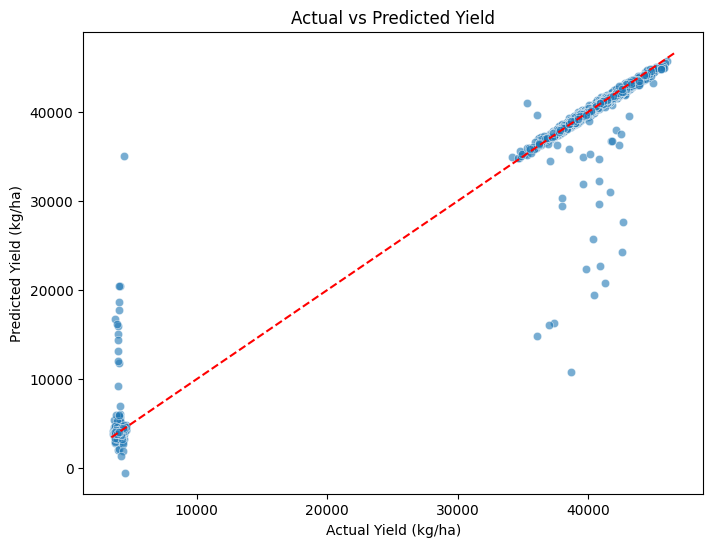

In [43]:
# Predictions vs Actuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='dashed')
plt.xlabel("Actual Yield (kg/ha)")
plt.ylabel("Predicted Yield (kg/ha)")
plt.title("Actual vs Predicted Yield")
plt.show()

<Figure size 1000x600 with 0 Axes>

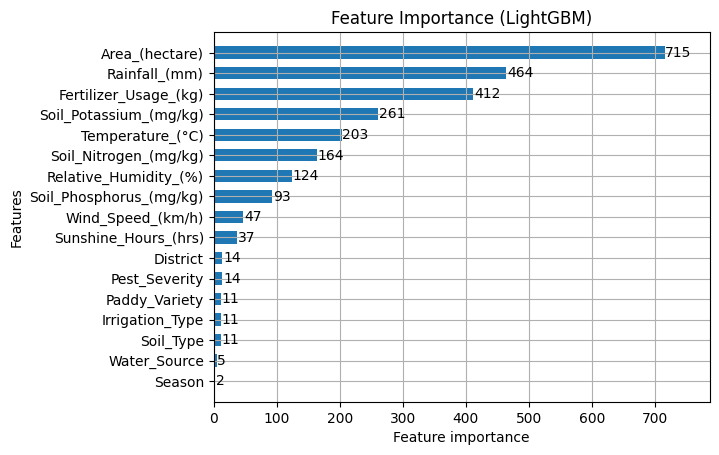

In [44]:
# Step 10: Feature Importance 📊
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgbm_model, height=0.6)
plt.title("Feature Importance (LightGBM)")
plt.show()

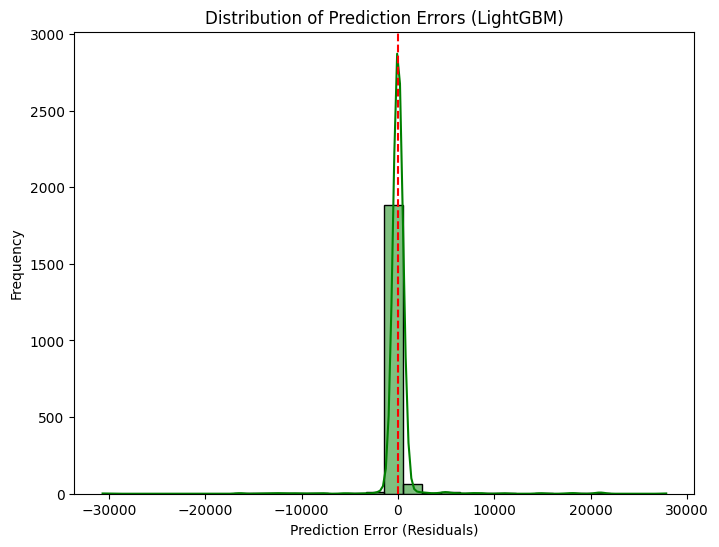

In [45]:
# Residuals Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="green")
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors (LightGBM)")
plt.show()

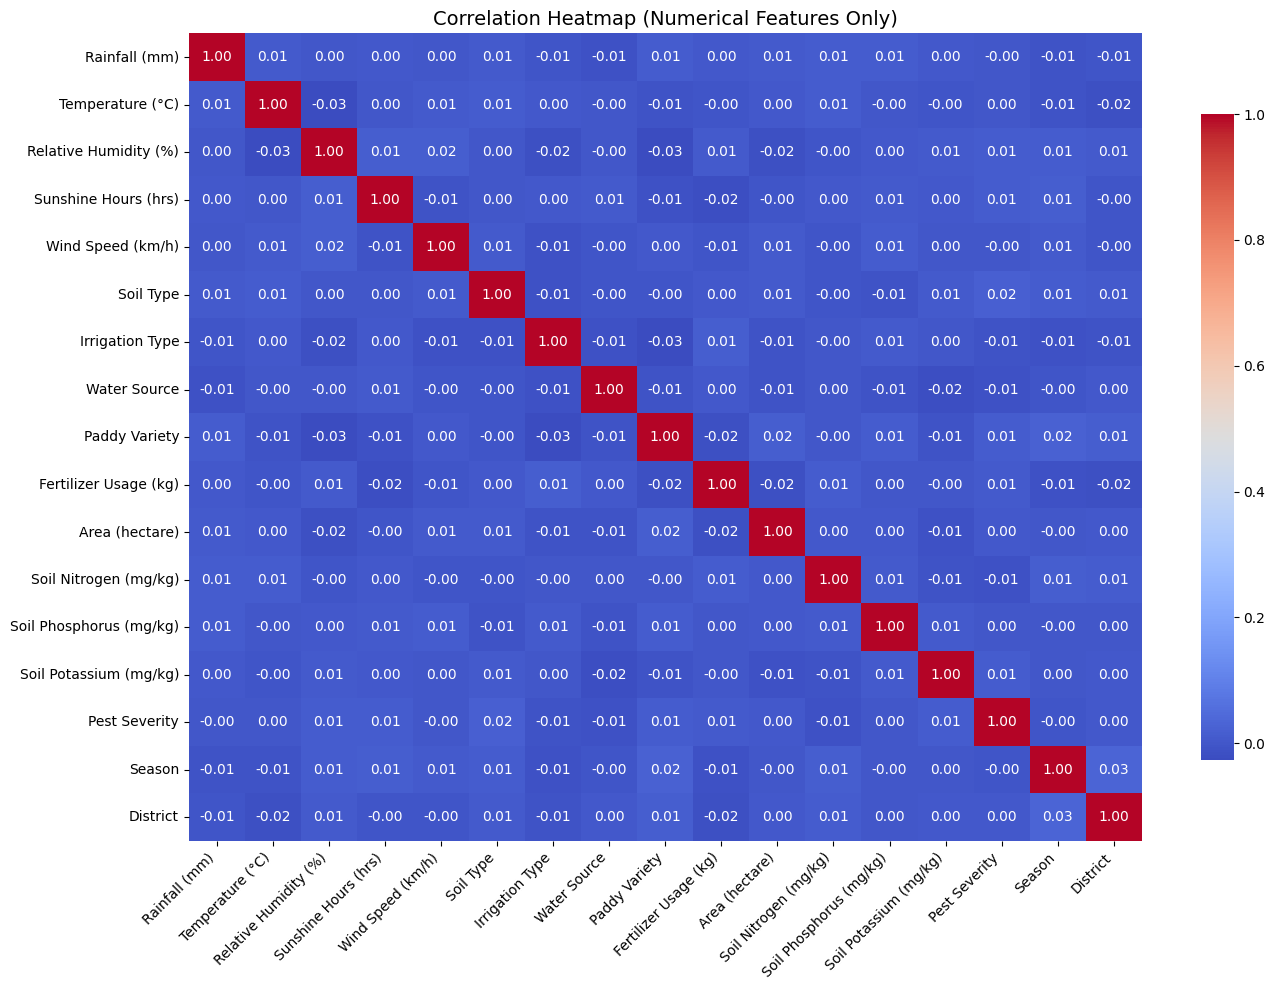

In [46]:
# Correlation Heatmap
numerical_X = X.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(
    numerical_X.corr(),
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap (Numerical Features Only)", fontsize=14)
plt.tight_layout()
plt.show()
